In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce

In [88]:
df = pd.read_csv("agora.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [89]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [90]:
median = df.Transport.median()
mean = df.Transport.mean()

In [91]:
median

214634.81

In [92]:
mean

215331.7324489796

In [93]:
df.Transport = df.Transport.fillna(median)

In [94]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [95]:
df.Area.head()

0      Dhaka
1        Ctg
2    Rangpur
3      Dhaka
4    Rangpur
Name: Area, dtype: object

# Enconding

In [96]:
# without use any encoding technique, use replace method
df.Area = df.Area.replace(['Dhaka', 'Ctg', 'Rangpur'], [3, 2,1])
df.Area.head()

0    3
1    2
2    1
3    3
4    1
Name: Area, dtype: int64

In [97]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [98]:
# use label encoder
df = pd.read_csv("agora.csv")
df.head()
label = LabelEncoder()
df.Area = label.fit_transform(df['Area'])
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [99]:
# if you can do it on multiple columns.
# for column in df.columns:
#     if df[column].dtype == np.number:
#         continue
#     df[column] = LabelEncoder().fit_transform(df[column])

In [100]:
# one hot encoding
df = pd.read_csv("agora.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [101]:
pd.get_dummies(df['Area']).head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [102]:
dummy_variables = pd.get_dummies(df['Area'], drop_first=True)
dummy_variables.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [103]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [104]:
new_df = df.drop('Area', axis=1)

In [105]:
new_df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [106]:
df = pd.concat([new_df, dummy_variables], axis=1)
df.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [107]:
# ordinal encoder
df = pd.read_csv("agora.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [108]:
city_list = ["Dhaka", "Ctg", "Rangpur"]
ordinal = OrdinalEncoder(categories=[city_list])
# alwasy 2d arra, cause it works number of sample and number of features
encoded_values=ordinal.fit_transform(df[['Area']])

In [109]:
new_area = pd.DataFrame(encoded_values, columns=['Area'])
new_area

,Area
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0
5,0.0
6,1.0
7,2.0
8,0.0
9,1.0


In [110]:
df.Area = new_area

In [111]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94


In [112]:
# hasing enoder
df = pd.read_csv("agora.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [113]:
encoders = ce.HashingEncoder(cols='Area', n_components=3)

In [114]:
encoders.fit_transform(df)

,col_0,col_1,col_2,Marketing Spend,Administration,Transport,Profit
0,0,1,0,114523.61,136897.80,471784.10,192261.83
1,0,0,1,162597.70,151377.59,443898.53,191792.06
2,1,0,0,153441.51,101145.55,407934.54,191050.39
3,0,1,0,144372.41,118671.85,383199.62,182901.99
4,1,0,0,142107.34,91391.77,366168.42,166187.94
5,0,1,0,131876.90,99814.71,362861.36,156991.12
6,0,0,1,134615.46,147198.87,127716.82,156122.51
7,1,0,0,130298.13,145530.06,323876.68,155752.60
8,0,1,0,120542.52,148718.95,311613.29,152211.77
9,0,0,1,123334.88,108679.17,304981.62,149759.96


In [115]:
# colison occure or data missing sometimes
encoders = ce.HashingEncoder(cols='Area', n_components=2)
encoders.fit_transform(df)

,col_0,col_1,Marketing Spend,Administration,Transport,Profit
0,0,1,114523.61,136897.80,471784.10,192261.83
1,0,1,162597.70,151377.59,443898.53,191792.06
2,0,1,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,1,134615.46,147198.87,127716.82,156122.51
7,0,1,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,1,123334.88,108679.17,304981.62,149759.96


# Feature selection functions

In [116]:
# SelectKBest
import seaborn as sn

In [117]:
bdf = pd.read_csv('BostonHousing.csv')
bdf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [118]:
bdf.shape

(506, 14)

In [119]:
bdf.medv.min()

5.0

In [120]:
bdf['medv'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: medv, Length: 229, dtype: int64

In [121]:
bdf.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [122]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [123]:
bdf['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

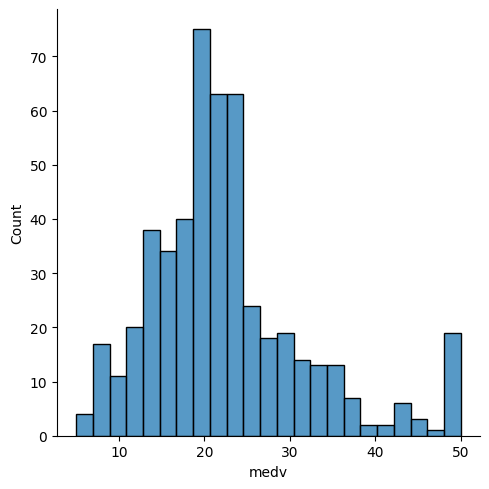

In [124]:
sn.displot(bdf['medv'])

In [125]:
y = bdf.medv
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [126]:
X = bdf.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [127]:
X = (X - X.min())/(X.max()-X.min())
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [128]:
from sklearn.feature_selection import SelectKBest, f_regression

In [129]:
X = SelectKBest(f_regression, k=4).fit_transform(X,y)
X

array([[0.06781525, 0.57750527, 0.28723404, 0.08967991],
       [0.24230205, 0.5479977 , 0.55319149, 0.2044702 ],
       [0.24230205, 0.6943859 , 0.55319149, 0.06346578],
       ...,
       [0.42045455, 0.65433991, 0.89361702, 0.10789183],
       [0.42045455, 0.61946733, 0.89361702, 0.13107064],
       [0.42045455, 0.47307913, 0.89361702, 0.16970199]])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 4), (51, 4), (455,), (51,))

In [132]:
from sklearn.neural_network import MLPRegressor

In [133]:
model = MLPRegressor(hidden_layer_sizes=(50,), solver='adam', random_state=1, max_iter=4000, verbose=False).fit(X_train, y_train)

In [134]:
print(model.score(X_train, y_train))

0.7692734175736802


In [135]:
y_pred = model.predict(X_test)
y_pred

array([26.15131604, 26.62849958, 16.26086724, 22.82024594, 20.08408616,
       22.29052096, 28.60634482, 19.01737217, 16.79649694, 24.10011722,
       27.32284875, 31.49533092, 18.68900694, 21.85898794, 20.50038067,
       19.056996  , 14.30636115, 43.85145395, 26.55573177, 12.06471981,
       19.78641147, 17.28971622, 24.31521421, 26.46158304, 29.7338072 ,
       13.00524426, 14.93839981, 21.08055518, 38.12392329, 13.58751372,
       27.43573865, 15.52574364, 46.04112459, 17.40314977, 23.48593173,
       18.77468065, 16.75035792, 30.42116613, 11.9671085 , 18.09276131,
       25.51730184, 24.68987111, 26.30680732, 13.25471318, 16.36004201,
       14.86944423, 47.08112386, 16.87069063, 25.64149225, 21.36255434,
       23.52149867])

In [136]:
print(model.score(X_test, y_test))

0.8666053919073078


In [137]:
from sklearn.metrics import mean_squared_error

In [138]:
rmse = mean_squared_error(y_test, y_pred, squared=True)
rmse

12.380189975083608

In [139]:
df = pd.DataFrame({'Actual': y_test, 'Predict':y_pred}).reset_index()
df

,index,Actual,Predict
0,307,28.2,26.151316
1,343,23.9,26.628500
2,47,16.6,16.260867
3,67,22.0,22.820246
4,362,20.8,20.084086
5,132,23.0,22.290521
6,292,27.9,28.606345
7,31,14.5,19.017372
8,218,21.5,16.796497
9,90,22.6,24.100117


In [140]:
udf = pd.read_csv('universal_studio_branches.csv')
udf.head(10)

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
5,John,1.0,"May 28, 2021",This is not a vacation,Worst experience I have ever had the rides are...,Universal Studios Florida
6,annapN7702ZW,2.0,"May 27, 2021",Expected More,"I just expected more. Alot of waiting around, ...",Universal Studios Florida
7,Deb P,2.0,"May 27, 2021",Disapointing.....,This was my 4th trip with my daughter to Unive...,Universal Studios Florida
8,Chuck N,1.0,"May 27, 2021",Greed makes for a terrible guest experience,Universal is one thing - Not Disney. Everythin...,Universal Studios Florida
9,Jen,4.0,"May 26, 2021",Good first time visit with kids,We spent 6 nights on site at Sapphire Falls as...,Universal Studios Florida


In [141]:
udf['text'] = udf['title'] + " " + udf['review_text']
udf

,reviewer,rating,written_date,title,review_text,branch,text
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,Universal is a complete Disaster - stick with ...
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,Food is hard to get. The food service is horri...
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,Disappointed I booked this vacation mainly to ...
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,My opinion When a person tries the test seat f...
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,"The Bourne Stuntacular...MUST SEE Ok, I can't ..."
...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,I'll Be Back Only If ... This is my first visi...
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,Universal Studios Singapore Experience We fina...
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,Impressive but not quite finished! We visited ...
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,Small but beautifully marked We visited on the...


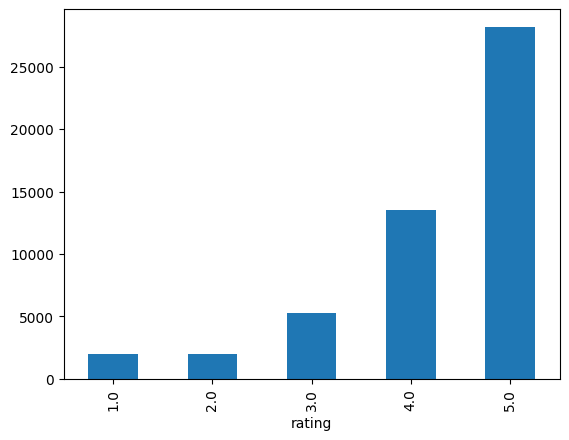

In [145]:
udf.groupby('rating').text.count().plot.bar(ylim=0)
plt.show()

In [147]:
data_clf=pd.read_csv('Iris.csv') # for classification problem
data_clf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [148]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [149]:
X_clf=data_clf.iloc[:,1:5]
X_clf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [150]:
y_clf=data_clf.iloc[:,5]
y_clf

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [153]:
from sklearn.feature_selection import SelectKBest, chi2

In [154]:
X_clf_new=SelectKBest(score_func=chi2,k=2).fit_transform(X_clf,y_clf)

In [155]:
print(X_clf_new[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [156]:
print(X_clf.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [158]:
data_reg=pd.read_csv('50_Startups.csv') # for regression problem
data_reg.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [159]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [160]:
X_reg=data_reg.iloc[:,0:3]
X_reg

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [161]:
y_reg=data_reg.iloc[:,4]
y_reg

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [162]:
X_reg_new=SelectKBest(score_func=f_regression, k=2).fit_transform(X_reg,y_reg)

In [163]:
print(X_reg_new[:5])

[[165349.2  471784.1 ]
 [162597.7  443898.53]
 [153441.51 407934.54]
 [144372.41 383199.62]
 [142107.34 366168.42]]


In [164]:
print(X_reg.head())

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42
